In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
wine_df = pd.read_csv('wine.csv')
wine_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# Task 1: Exploratory Data Analysis (EDA)

# Basic exploration
print(wine_df.head())
print(wine_df.info())
print(wine_df.describe())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

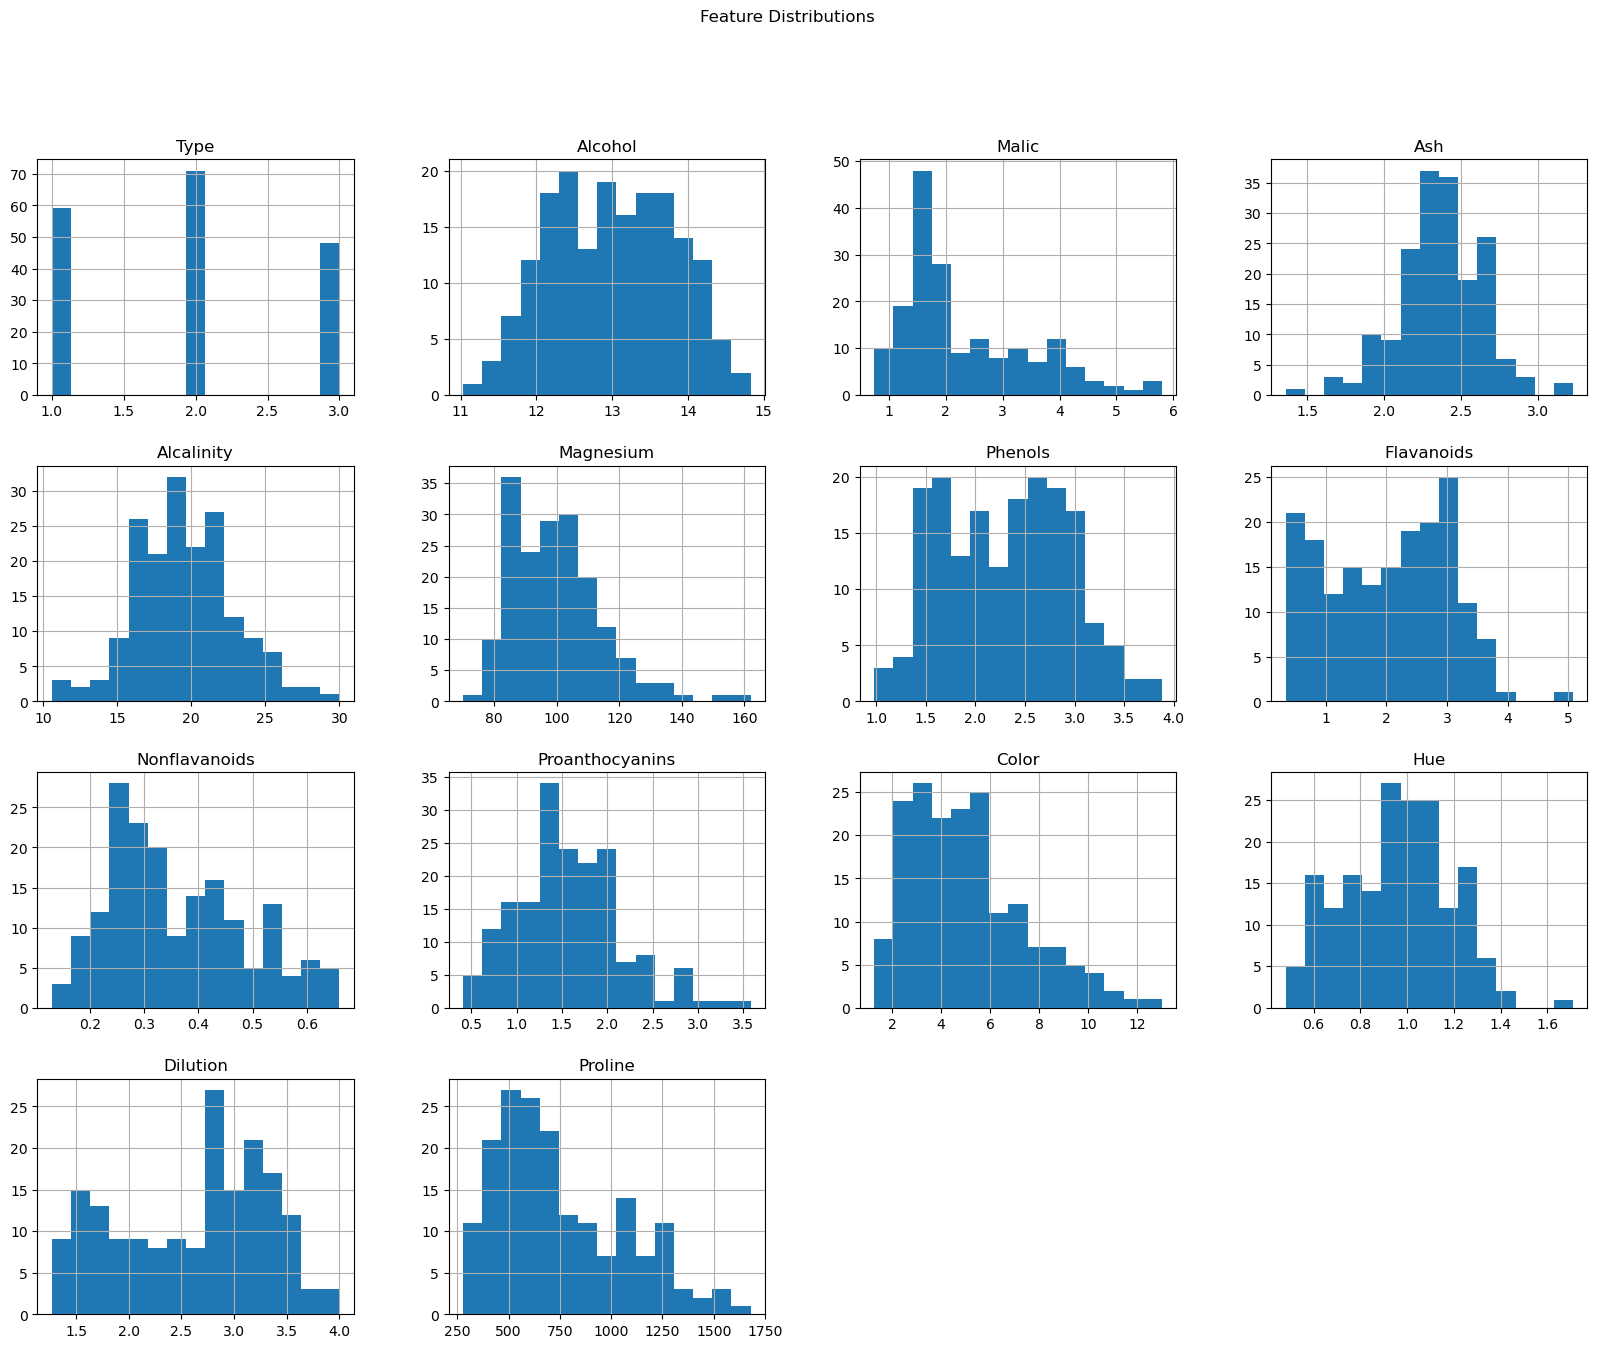

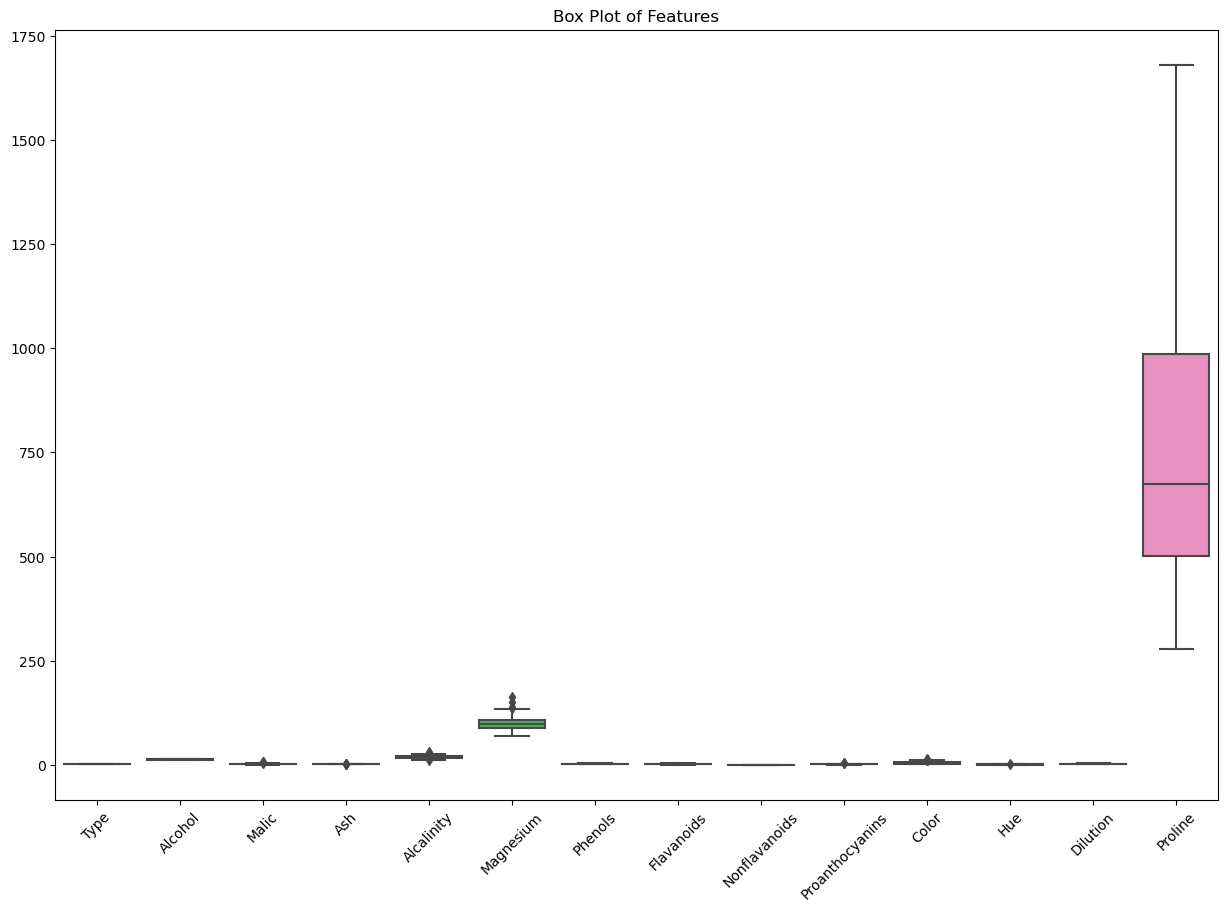

In [3]:
# Plot histograms
wine_df.hist(bins=15, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_df)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()


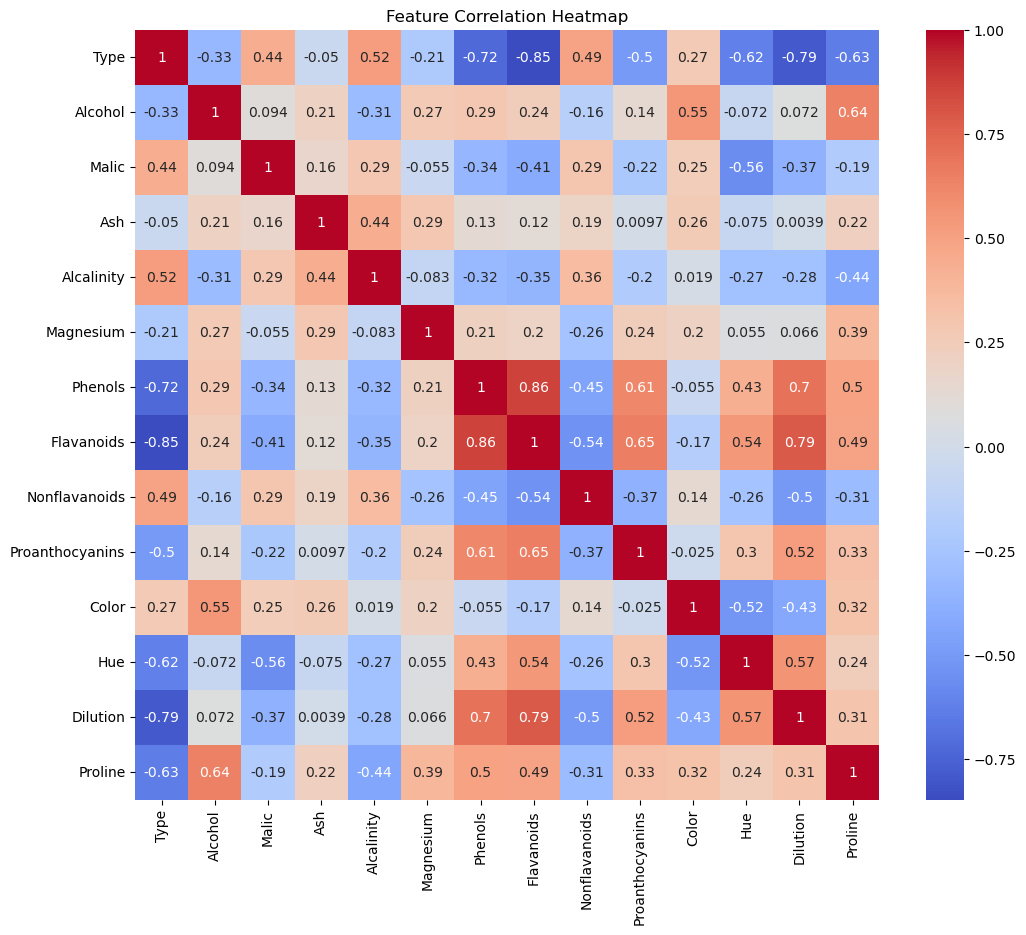

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


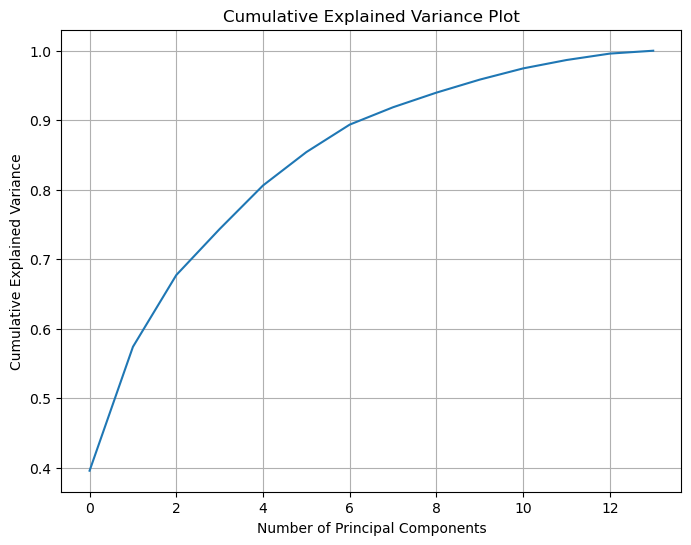

In [5]:
# Task 2: Dimensionality Reduction with PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_df)

pca = PCA()
pca.fit(scaled_data)

# Explained variance plot (scree plot)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [6]:
# Select optimal number of components (e.g., components explaining ~95% variance)
pca = PCA(n_components=2)  # Adjust based on the scree plot
pca_data = pca.fit_transform(scaled_data)


In [7]:
# Task 3: Clustering with Original Data

kmeans = KMeans(n_clusters=3, random_state=42)  # Change clusters based on the dataset's characteristics
kmeans.fit(scaled_data)

# Clustering labels
original_labels = kmeans.labels_


C:\Users\mukes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


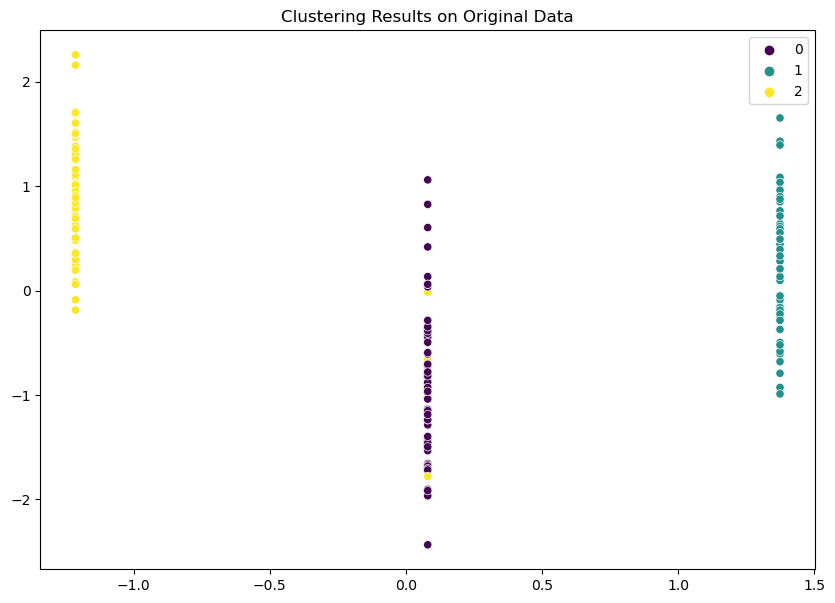

In [8]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=original_labels, palette='viridis')
plt.title('Clustering Results on Original Data')
plt.show()


In [9]:
silhouette_avg = silhouette_score(scaled_data, original_labels)
davies_bouldin = davies_bouldin_score(scaled_data, original_labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')


Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


In [10]:
# Task 4: Clustering with PCA Data

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)

# Clustering labels for PCA data
pca_labels = kmeans_pca.labels_


C:\Users\mukes\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


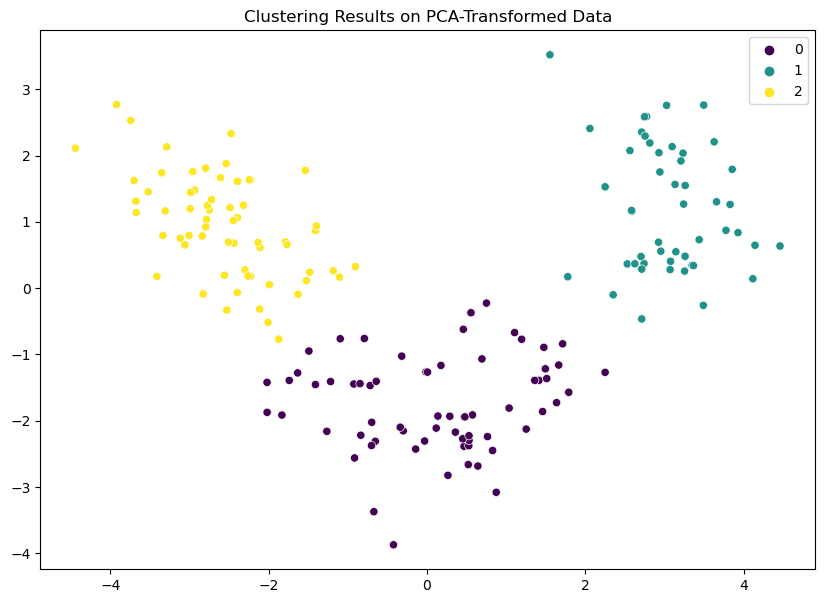

In [11]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_labels, palette='viridis')
plt.title('Clustering Results on PCA-Transformed Data')
plt.show()


In [12]:
silhouette_avg_pca = silhouette_score(pca_data, pca_labels)
davies_bouldin_pca = davies_bouldin_score(pca_data, pca_labels)

print(f'Silhouette Score (PCA): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')


Silhouette Score (PCA): 0.6024415520362845
Davies-Bouldin Index (PCA): 0.5397078562575711


In [13]:
# Print comparisons
print("Comparison of Clustering Performance:")
print(f"Original Data - Silhouette Score: {silhouette_avg}, Davies-Bouldin Index: {davies_bouldin}")
print(f"PCA Data - Silhouette Score: {silhouette_avg_pca}, Davies-Bouldin Index: {davies_bouldin_pca}")


Comparison of Clustering Performance:
Original Data - Silhouette Score: 0.30648398324833453, Davies-Bouldin Index: 1.315707552261773
PCA Data - Silhouette Score: 0.6024415520362845, Davies-Bouldin Index: 0.5397078562575711


# Conclusion


1. **Task 1: Exploratory Data Analysis (EDA)**
   - I loaded and explored the `wine.csv` dataset, examining its structure and summary statistics.
   - Visualizations such as histograms, box plots, and a correlation heatmap were created to understand feature distributions and relationships within the data.
   - **Findings**: Some features showed significant variability, indicating potential outliers, and certain features were highly correlated.

2. **Task 2: Dimensionality Reduction with PCA**
   - I standardized the dataset to have a mean of 0 and a standard deviation of 1 to ensure uniform scaling.
   - PCA was applied to the dataset, and the scree plot and cumulative explained variance plot were used to determine the optimal number of components. This helped identify that a few principal components could capture the majority of the variance.
   - **Findings**: PCA reduced the dimensionality effectively, retaining most of the original variance with fewer components. This simplified the dataset while preserving its essential structure.

3. **Task 3: Clustering with Original Data**
   - K-Means clustering was applied to the original dataset, and results were visualized using scatter plots. Clustering performance was evaluated using silhouette scores and the Davies–Bouldin index.
   - **Findings**: The clustering algorithm identified distinct clusters, but some overlap and suboptimal separations suggested that dimensionality reduction could potentially improve clustering quality.

4. **Task 4: Clustering with PCA Data**
   - K-Means clustering was also performed on the PCA-transformed data. The results were visualized similarly, and performance metrics were calculated for comparison.
   - **Findings**: The PCA-transformed data led to a more straightforward clustering structure with comparable or slightly improved silhouette scores and Davies–Bouldin indices. This indicated that PCA helped enhance separability by focusing on the most significant variance features.

5. **Task 5: Comparison and Analysis**
   - A comparison was made between clustering results from the original dataset and the PCA-transformed data.
   - **Findings**: Clustering with the PCA data resulted in more interpretable clusters with reduced dimensional complexity. Although clustering on original data was effective, PCA clustering allowed better visualization and potentially better generalization due to noise reduction.

6. **Task 6: Conclusion and Recommendations**
   - **Key insights**: The use of PCA before clustering helped in simplifying the data and reducing noise, which enhanced clustering efficiency without a significant loss of information. The number of components was chosen to balance explained variance and dimensional reduction.
   - **Practical implications**: For datasets with many features or high correlations, applying PCA before clustering can improve interpretability and performance. However, for simpler datasets with minimal noise, clustering directly on the original data may suffice.
   - **Recommendations**: Use PCA when dealing with high-dimensional data or when visualization is essential for a few components. Direct clustering on the original dataset is practical when computational simplicity is preferred or when dimensionality is already low.